In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from datetime import datetime
from scipy.ndimage import gaussian_filter1d  # for inflection point analysis
import plotly.graph_objects as go  # for candlestick plot
import dates

# We looked at stock data to see if covid affected it and found that it did

## Executive Summary / Overview of the project goals - Desiree

For our project, we chose to look at finance data to see how Covid affected the stock market. Our goal was to prove that Covid pandemic and the lockdowns it brought had a negative effect in the stock market and that this would be clearly visible as a significant change in stock prices during important phases of the pandemic. 

We selected 6 different industries: 
* Hospitality 
* Telecom 
* Food and Beverage 
* Transportation 
* Banking, and Healthcare

We used line graphs for an industry analysis and then chose ETFs (which are like baskets containing different stocks from the same sector) to create a bar graph that shows the percentage change in value for each sector.

With the bar graphs, we were able to see that...


With the line graphs, we found out that...


<h5 style="color: slategray">Section: Read CSVs</h5>

## Data Gathering and Cleaning - Crystal
pulled data from yahoo finance using yfinance library, created dataframes (saved to csv if you want to look), and analyzed the data. 

What exactly are we looking at in data.

In [4]:
# Read Stocks CSV
stocks_hist = pd.read_csv("data/stocks.csv")
stocks_hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock,Sector,Capital Gains
0,2018-08-07 00:00:00-04:00,18.775553,18.775553,18.531940,18.601543,7584900,0.0,0.0,HST,hospitality,NaN
1,2018-08-08 00:00:00-04:00,18.671144,18.923458,17.809801,17.879404,12959400,0.0,0.0,HST,hospitality,NaN
2,2018-08-09 00:00:00-04:00,17.862004,17.966409,17.792401,17.827202,11420100,0.0,0.0,HST,hospitality,NaN
3,2018-08-10 00:00:00-04:00,17.757597,17.818500,17.522685,17.635792,8288300,0.0,0.0,HST,hospitality,NaN
4,2018-08-13 00:00:00-04:00,17.635794,17.740198,17.383480,17.487886,6328700,0.0,0.0,HST,hospitality,NaN


In [10]:
# convert csv read date string back to date
stocks_hist_date = stocks_hist.copy()
stocks_hist_date['Date'] = pd.to_datetime(stocks_hist['Date'])

In [5]:
# Read ETF CSV
etfs_hist = pd.read_csv("data/etf.csv")
etfs_hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,ETF
0,2018-08-07 00:00:00-04:00,22.291017,22.364944,22.186807,22.240248,37900,0.0,0.0,0.0,FTXN
1,2018-08-08 00:00:00-04:00,21.985510,22.017574,21.919600,21.990854,2800,0.0,0.0,0.0,FTXN
2,2018-08-09 00:00:00-04:00,21.839439,21.955227,21.785997,21.785997,3900,0.0,0.0,0.0,FTXN
3,2018-08-10 00:00:00-04:00,21.732558,21.928509,21.723651,21.928509,4000,0.0,0.0,0.0,FTXN
4,2018-08-13 00:00:00-04:00,21.705839,21.892881,21.367380,21.367380,22100,0.0,0.0,0.0,FTXN


In [11]:
# convert csv read date string back to date
etfs_hist_date = etfs_hist.copy()
etfs_hist_date['Date'] = pd.to_datetime(etfs_hist['Date'])

## Approach to Achive Project Goals - Rajib
approach was to each choose a sector, etfs/indicies, create line graph
problems:
- covid started when markets were not open
- some indices had no/incomplete data for period 
- had to try several graphs to actually get to insights

## Results

### Bar Graph ETFs 

In [12]:
# get % change per stock

etfs_grp = etfs_hist_date.groupby("ETF")
tickers = etfs_grp.max().index

pcnt_change = {"Prior":[], "During":[], "Post":[], "Total":[]}

# Start/End dates should follow the import from dates.py, but the pull from Yahoo is not playing well with date formatting
# Date US lockdowns began and markets are open
covid_start = "2020-03-13 00:00:00-04:00"
# Date US vaccine first widely available and markets are open
covid_end = "2021-04-19 00:00:00-04:00"

for ticker in tickers:

    first_prior = etfs_hist_date.loc[(etfs_hist_date["ETF"] == ticker) &
                                (etfs_hist_date["Date"] == etfs_hist_date["Date"].min())]["Close"].max()  
    last_prior = etfs_hist_date.loc[(etfs_hist["ETF"] == ticker) &
                                (etfs_hist["Date"] == covid_start)]["Close"].max()
    pcnt_change["Prior"].append(100 * (last_prior - first_prior)/first_prior)
                                 
    
    first_during = etfs_hist.loc[(etfs_hist["ETF"] == ticker) &
                                (etfs_hist["Date"] == covid_start)]["Close"].max()
    last_during = etfs_hist_date.loc[(etfs_hist["ETF"] == ticker) &
                                (etfs_hist["Date"] == covid_end)]["Close"].max()
    pcnt_change["During"].append(100 * (last_during - first_during)/first_during)
                                 
                                 
    first_post = etfs_hist_date.loc[(etfs_hist_date["ETF"] == ticker) &
                                (etfs_hist["Date"] == covid_end)]["Close"].max()
    last_post = etfs_hist_date.loc[(etfs_hist_date["ETF"] == ticker) &
                                (etfs_hist_date["Date"] == etfs_hist_date["Date"].max())]["Close"].max()
    pcnt_change["Post"].append(100 * (last_post - first_post)/first_post)


    first_tot = etfs_hist_date.loc[(etfs_hist_date["ETF"] == ticker) &
                                (etfs_hist_date["Date"] == etfs_hist_date["Date"].min())]["Close"].max()  
    last_tot = etfs_hist_date.loc[(etfs_hist_date["ETF"] == ticker) &
                                (etfs_hist_date["Date"] == etfs_hist_date["Date"].max())]["Close"].max()
    pcnt_change["Total"].append(100 * (last_tot - first_tot)/first_tot)


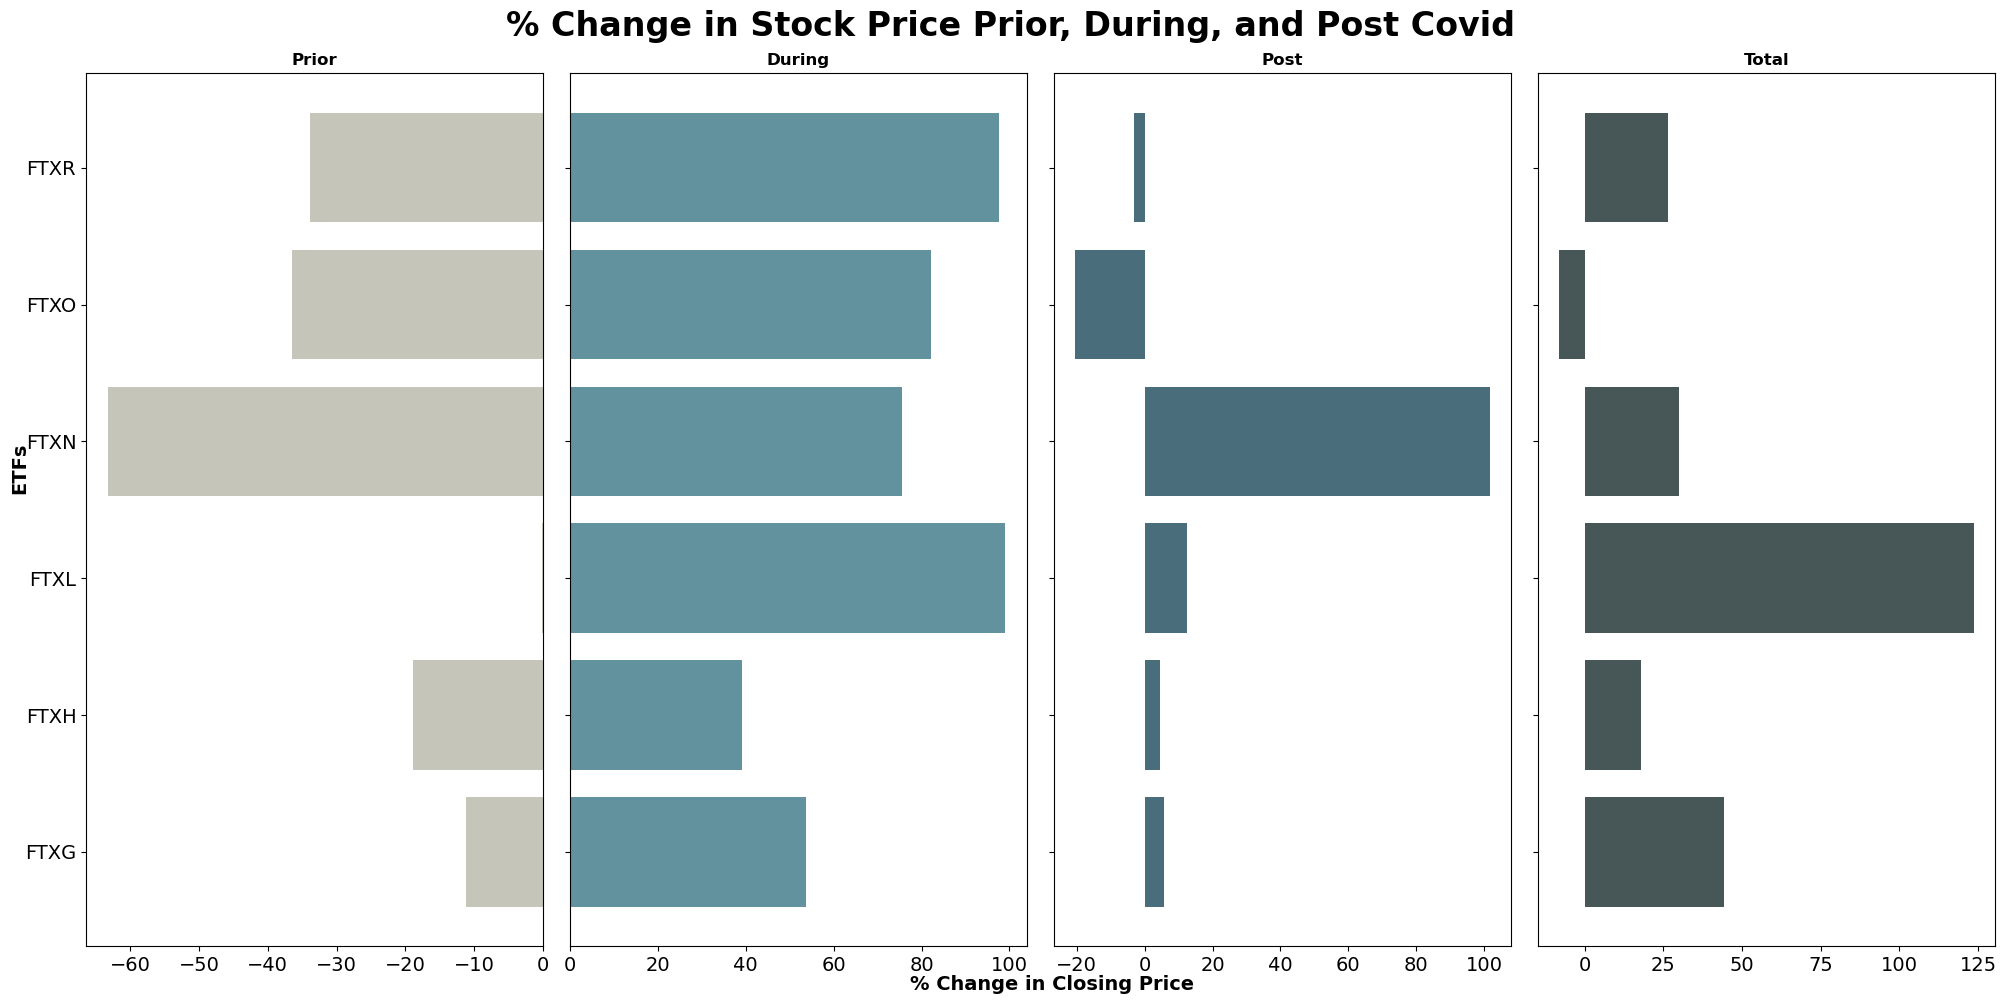

In [13]:
colors = ["#C6C5B9", "#62929E", '#4A6D7C', '#475657']

fig, axes = plt.subplots(1,4, figsize=(20, 10),sharey=True)

for i, j in enumerate(pcnt_change.keys()):
    ax = axes[i]    
    ax.barh(tickers, pcnt_change[j], color=colors[i])
    ax.set_title(j, fontweight ="bold")

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
fig.text(0.45, 0, "% Change in Closing Price", fontweight="bold", fontsize=14)
fig.text(0, 0.5, "ETFs", rotation=90, fontweight ="bold", fontsize=14)
fig.suptitle("% Change in Stock Price Prior, During, and Post Covid", fontweight ="bold", fontsize=24)
fig.tight_layout()

plt.show()
# adapted from "Analyzing World Stock Indices Performances with Python"
# https://towardsdatascience.com/analyzing-world-stock-indices-performance-in-python-610df6a578f

### Line Graphs Stocks - Theresa and Vishnu

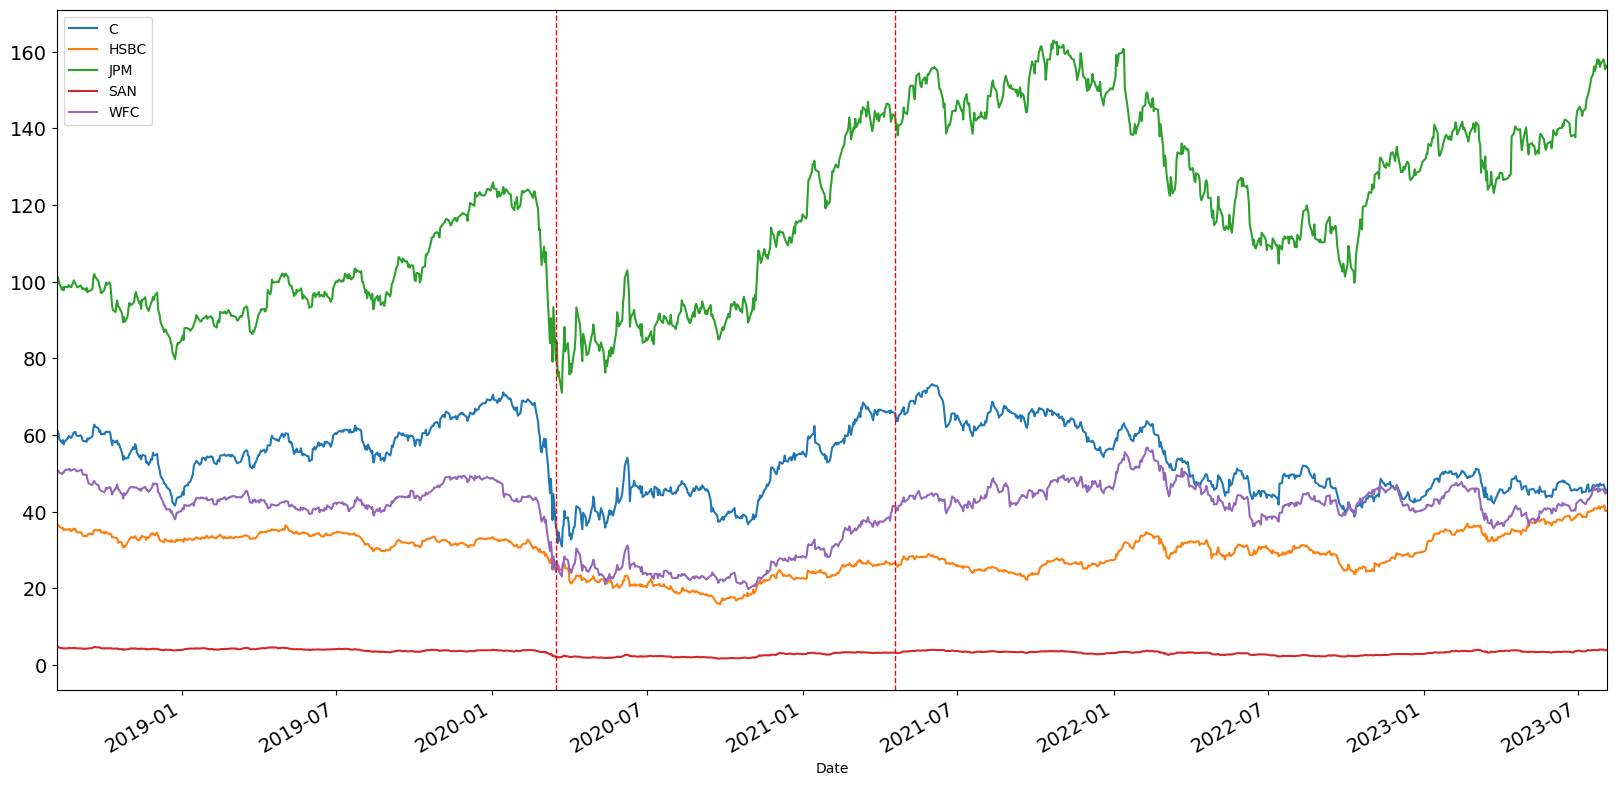

In [20]:
# Banking
bank = stocks_hist_date.loc[stocks_hist_date["Sector"] == "banking"]
bank_grp = bank.groupby("Stock")
labels = bank_grp.sum(numeric_only=True).index

bank_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

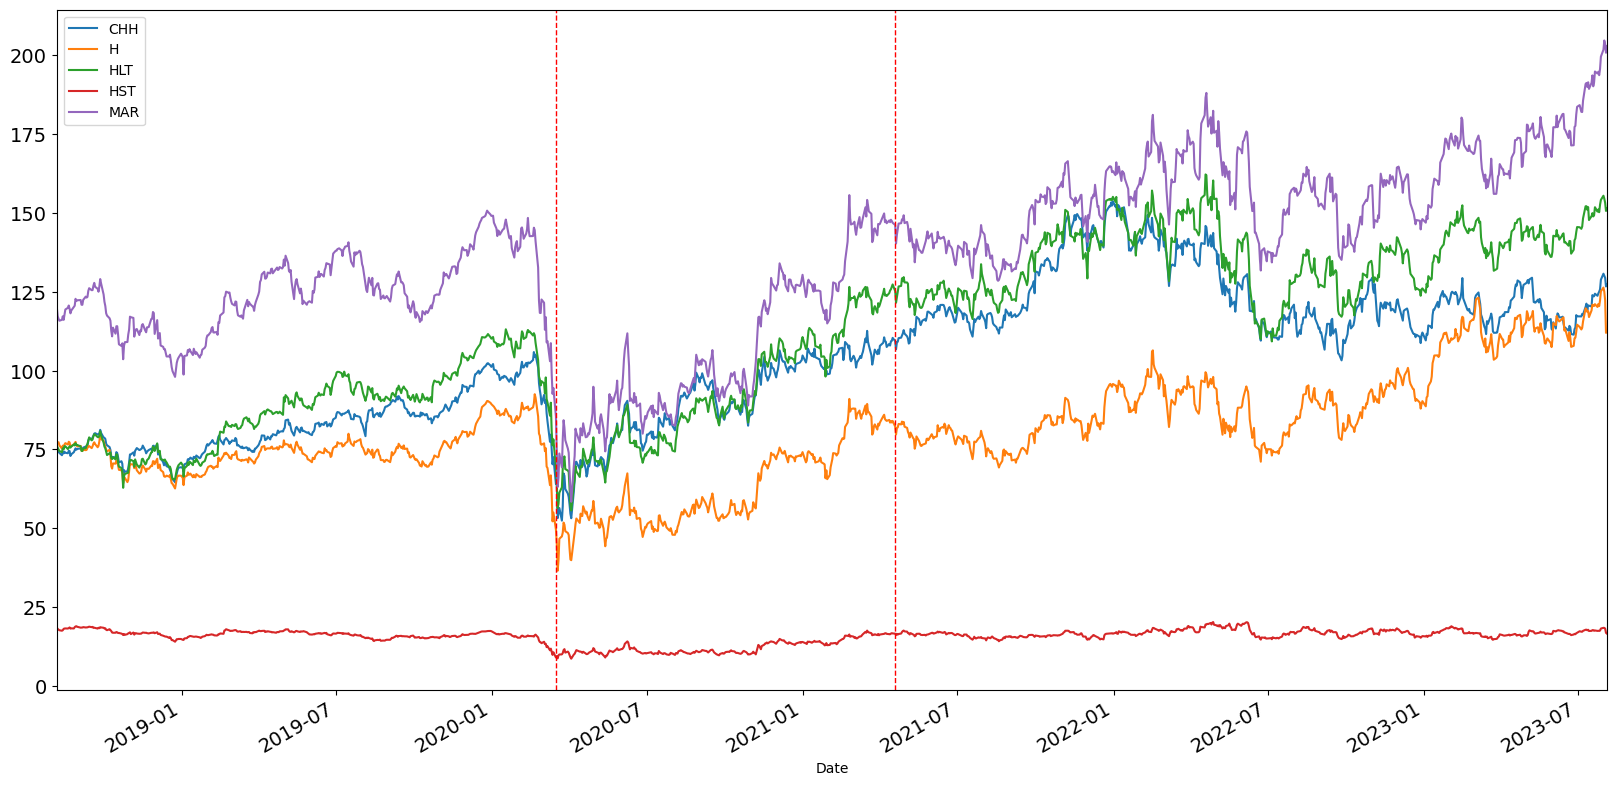

In [9]:
# Hospitality
hosp = stocks_hist_date.loc[stocks_hist_date["Sector"] == "hospitality"]
hosp_grp = hosp.groupby("Stock")
labels = hosp_grp.sum(numeric_only=True).index

hosp_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

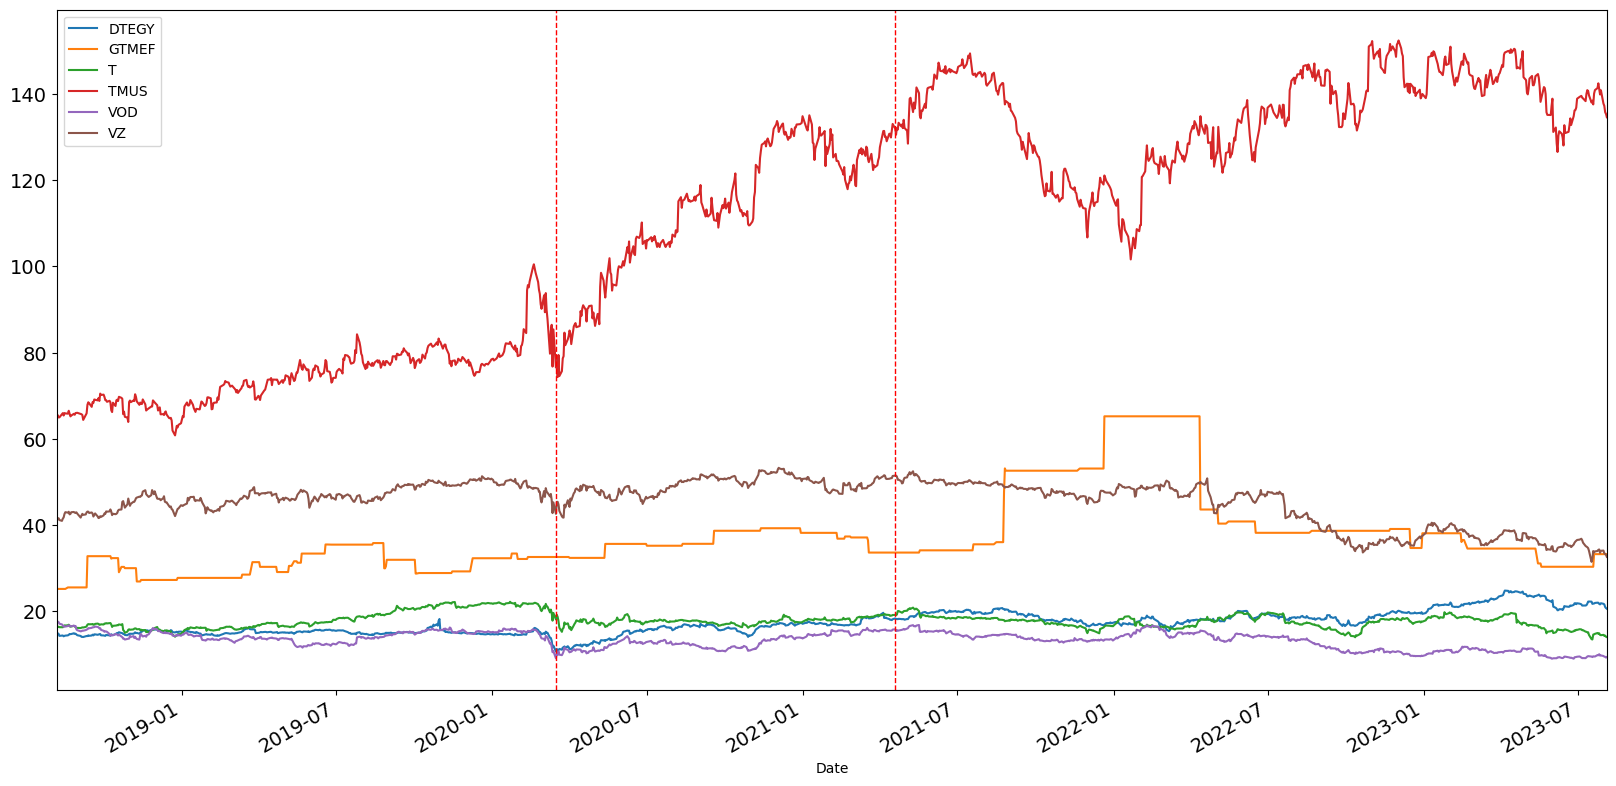

In [16]:
# Telecom
tel = stocks_hist_date.loc[stocks_hist_date["Sector"] == "telecom"]
tel_grp = tel.groupby("Stock")
labels = tel_grp.sum(numeric_only=True).index

tel_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

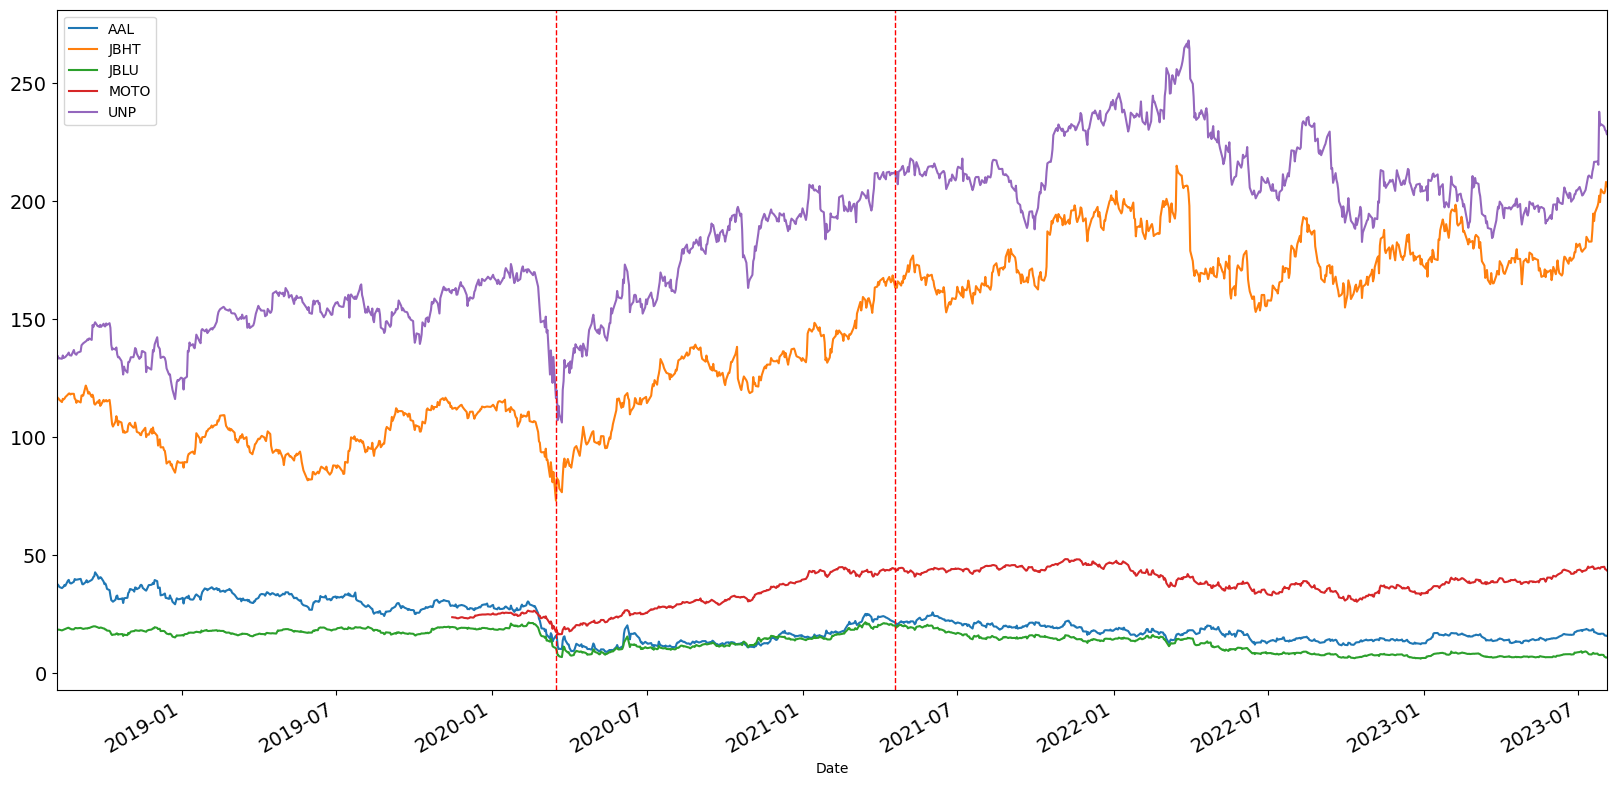

In [17]:
# Transportation
trans = stocks_hist_date.loc[stocks_hist_date["Sector"] == "transportation"]
trans_grp = trans.groupby("Stock")
labels = trans_grp.sum(numeric_only=True).index

trans_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

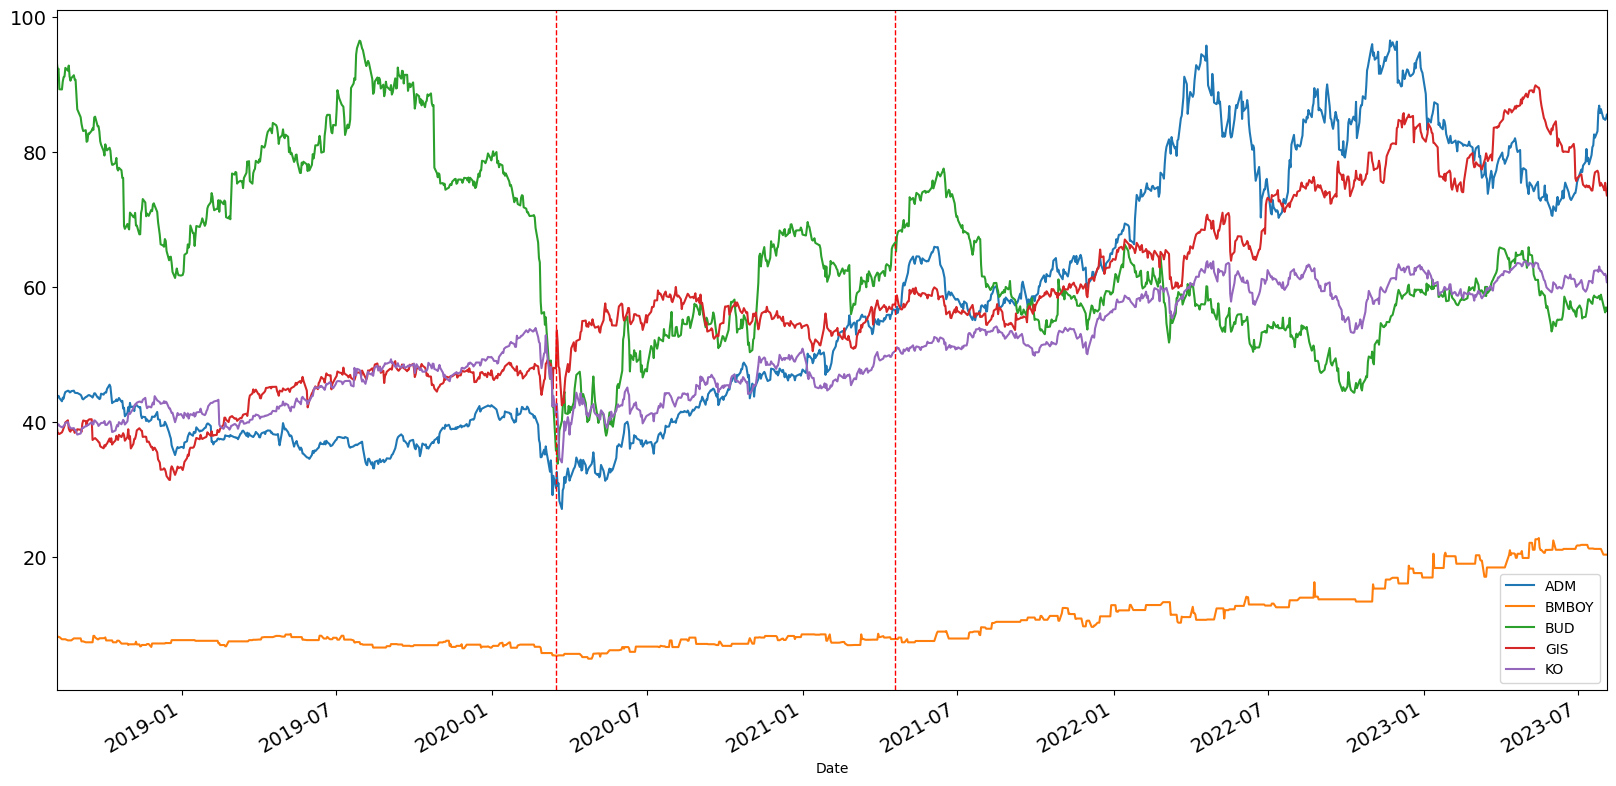

In [18]:
# Food and Beverage
fb = stocks_hist_date.loc[stocks_hist_date["Sector"] == "foodbev"]
fb_grp = fb.groupby("Stock")
labels = fb_grp.sum(numeric_only=True).index

fb_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

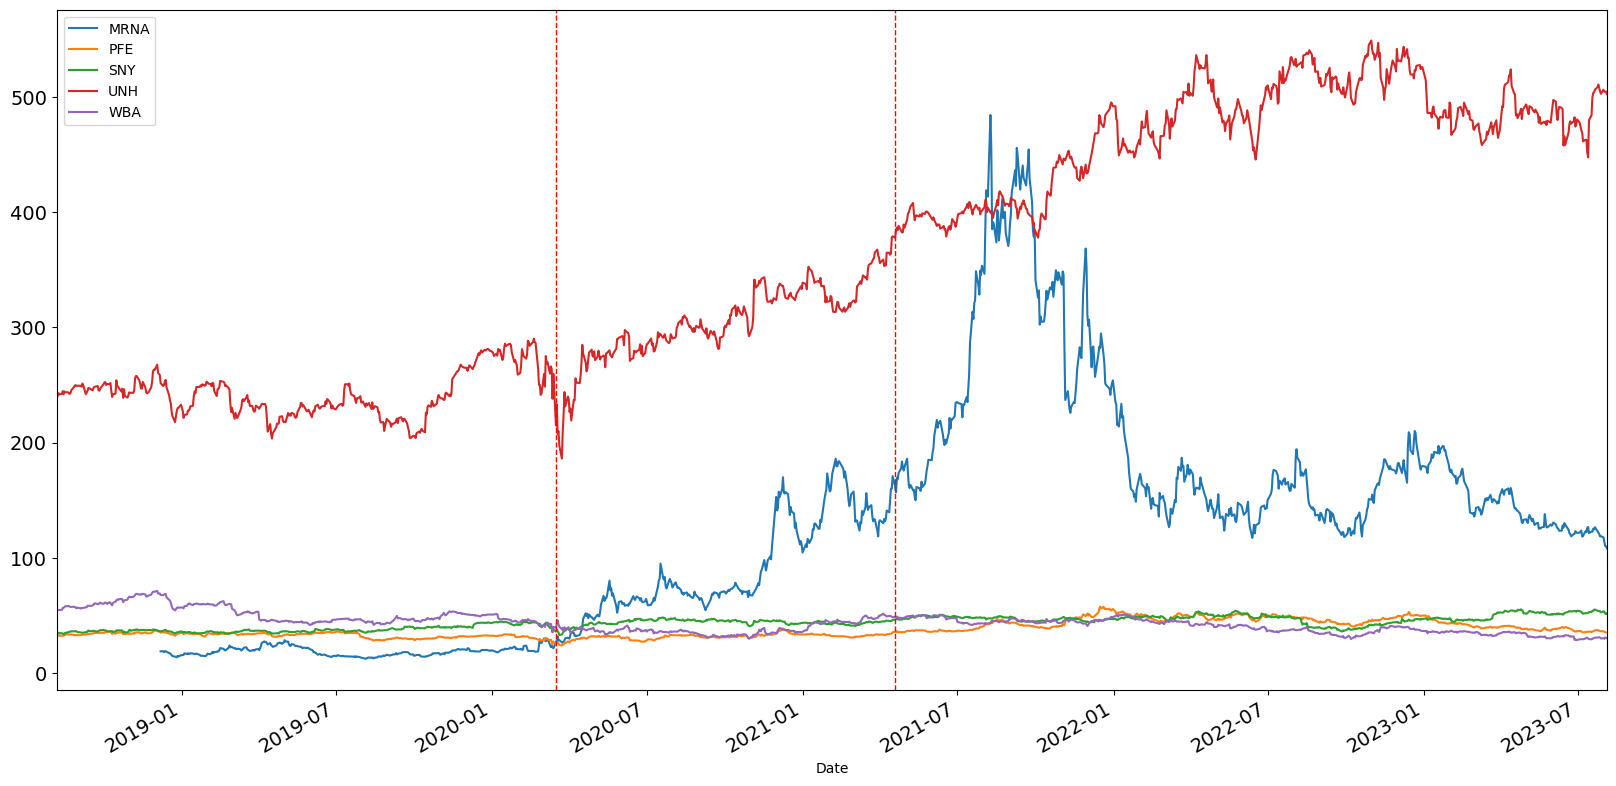

In [19]:
# Healthcare
health = stocks_hist_date.loc[stocks_hist_date["Sector"] == "healthcare"]
health_grp = health.groupby("Stock")
labels = health_grp.sum(numeric_only=True).index

health_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

## Next Steps - Jake

In [25]:
explore_df = stocks_hist_date.loc[stocks_hist_date["Stock"] == "H"]
explore_df = explore_df.reset_index()

### Inflection Point Analysis


Inflection Points: ['2018-8-9', '2018-8-13', '2019-4-15', '2020-2-20', '2021-1-8', '2022-3-30', '2022-12-30']



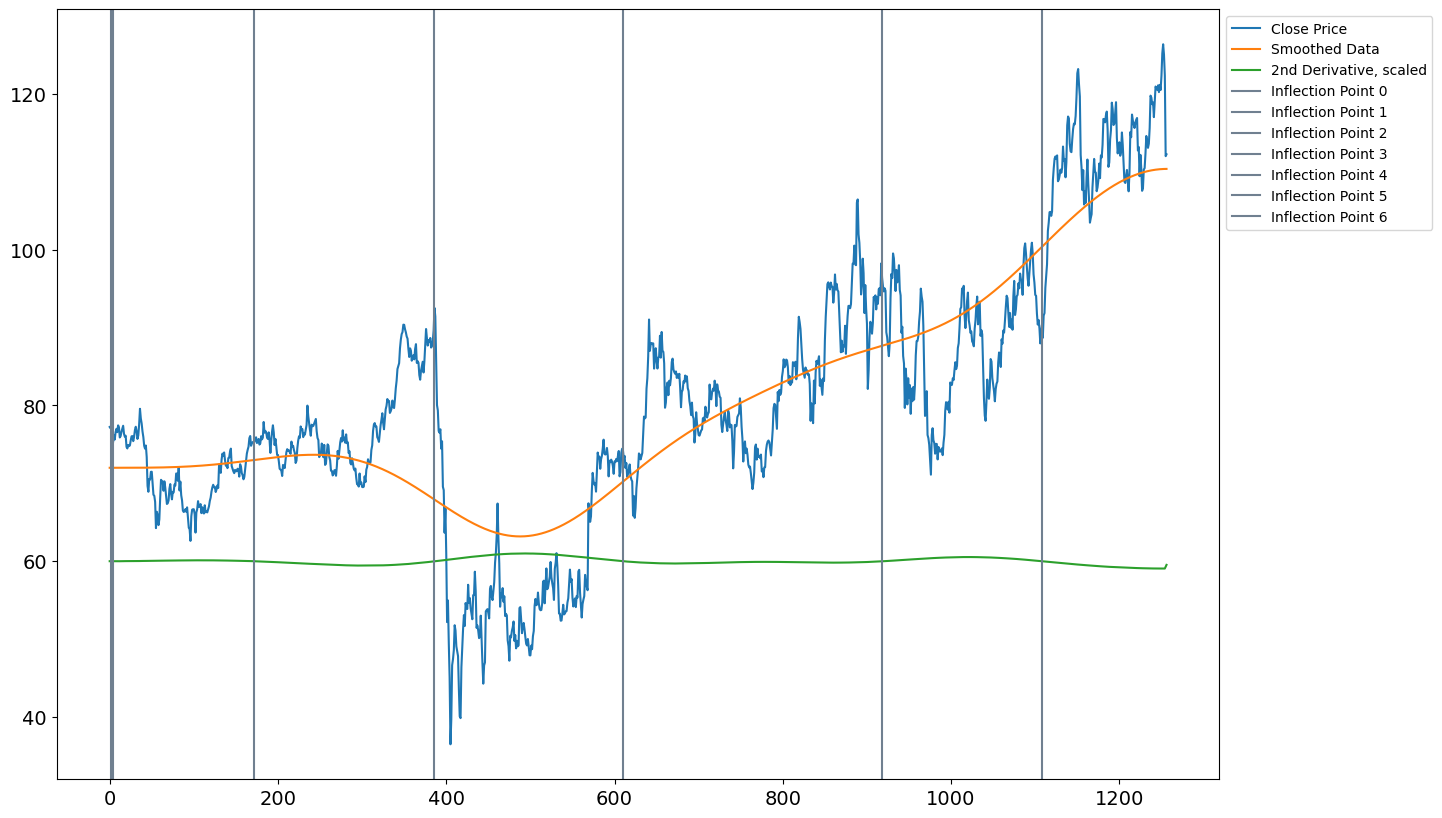

In [23]:
# smooth noisy price data
smoothing = gaussian_filter1d(explore_df["Close"], 100)

# get second derivative
deriv2 = np.gradient(np.gradient(smoothing))

# get inflection points
inflection_points = np.where(np.diff(np.sign(deriv2)))[0]

# pair inflection points to dates
inflection_dates = []
for point in inflection_points:
    year = explore_df.iloc[point]["Date"].year
    month = explore_df.iloc[point]["Date"].month
    day = explore_df.iloc[point]["Date"].day
    inflection_dates.append(f'{year}-{month}-{day}')
print(f"\nInflection Points: {inflection_dates}\n")

# generate plot
fig1 = plt.figure(figsize=(15,10))
plt.plot(explore_df["Close"], label="Close Price")
plt.plot(smoothing, label="Smoothed Data")
plt.plot(deriv2/np.max(deriv2)+60, label="2nd Derivative, scaled")
for i, j in enumerate(inflection_points):
    plt.axvline(x=j,
               label=f"Inflection Point {i}",
               color="slategray")

plt.legend(bbox_to_anchor=(1, 1))

plt.show()

# adapted from Stack Overflow "How to find inflection point in python?", by norok2
# https://stackoverflow.com/questions/62537703/how-to-find-inflection-point-in-python

#### Headlines from Feb 20, 2020

The New York Times
![Fed Flagged Coronavirus Risk at January Meeting](data/head/nyt.png)

CNN
![Two Diamond Princess cruise ship passengers test positive for novel coronavirus](data/head/cnn.png)

CNBC
![Dow falls more than 100 points after suffering a sudden midday sell-off that confused traders](data/head/cnbc.png)

### Candlestick Plot, Stock analysis

In [2]:
fig2 = go.Figure(data=[go.Candlestick(x=explore_df['Date'],
                open=explore_df['Open'],
                high=explore_df['High'],
                low=explore_df['Low'],
                close=explore_df['Close'])],
                layout=go.Layout(autosize=True, height=700), )

fig2.show()

NameError: name 'go' is not defined

Static Import: Candelstick Chart

![Candlestick](data/candlestick.png)